In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [128]:
df = pd.read_csv("data.csv")

print(df)

         qs1       qs2       qs3       qs4       qs5    merge1  partition_sort
0   0.064943  0.116558  0.114080  0.145327  0.125984  0.152273        0.055551
1   0.062991  0.110112  0.112591  0.134416  0.129951  0.150784        0.055552
2   0.064480  0.113584  0.123503  0.124495  0.127968  0.150815        0.056018
3   0.068944  0.115073  0.114576  0.141856  0.126976  0.152272        0.055552
4   0.064480  0.112591  0.113586  0.123038  0.135873  0.150783        0.055056
..       ...       ...       ...       ...       ...       ...             ...
68  0.064481  0.123007  0.126480  0.122512  0.131936  0.150290        0.055053
69  0.062992  0.113585  0.112620  0.134883  0.125984  0.159712        0.064975
70  0.063017  0.117526  0.112122  0.124994  0.129925  0.155745        0.056046
71  0.063488  0.115595  0.112564  0.123008  0.129456  0.149792        0.055056
72  0.062496  0.112592  0.113087  0.126481  0.128463  0.150288        0.054560

[73 rows x 7 columns]


In [129]:
anova = stats.f_oneway(df["qs1"],df["qs2"],df["qs3"],df["qs4"],df["qs5"],df["merge1"],df["partition_sort"])
print(anova.pvalue)

0.0


4.7957484553858393e-17
0.0010946858846789544
2.707334190319738e-07
0.023982534936909744
0.0001296169565333787
2.1194875550912712e-07
1.36992757823709e-15


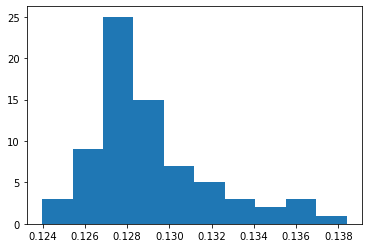

In [130]:
normal = stats.normaltest(df["qs1"])
print(normal.pvalue)
normal = stats.normaltest(df["qs2"])
print(normal.pvalue)
normal = stats.normaltest(df["qs3"])
print(normal.pvalue)
normal = stats.normaltest(df["qs4"])
print(normal.pvalue)
normal = stats.normaltest(df["qs5"])
print(normal.pvalue)
normal = stats.normaltest(df["merge1"])
print(normal.pvalue)
normal = stats.normaltest(df["partition_sort"])
print(normal.pvalue)
plt.figure()
plt.hist(df["qs5"])
plt.show()

In [131]:
melt = pd.melt(df)
print(melt)

           variable     value
0               qs1  0.064943
1               qs1  0.062991
2               qs1  0.064480
3               qs1  0.068944
4               qs1  0.064480
..              ...       ...
506  partition_sort  0.055053
507  partition_sort  0.064975
508  partition_sort  0.056046
509  partition_sort  0.055056
510  partition_sort  0.054560

[511 rows x 2 columns]


In [132]:
post_hoc = pairwise_tukeyhsd(melt['value'],melt['variable'],alpha=0.05)

In [133]:
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
merge1,partition_sort,-0.0969,0.001,-0.0987,-0.095,True
merge1,qs1,-0.0883,0.001,-0.0901,-0.0864,True
merge1,qs2,-0.0379,0.001,-0.0398,-0.0361,True
merge1,qs3,-0.0377,0.001,-0.0396,-0.0358,True
merge1,qs4,-0.0217,0.001,-0.0236,-0.0199,True
merge1,qs5,-0.0239,0.001,-0.0257,-0.022,True
partition_sort,qs1,0.0086,0.001,0.0067,0.0105,True
partition_sort,qs2,0.0589,0.001,0.0571,0.0608,True
partition_sort,qs3,0.0592,0.001,0.0573,0.061,True
partition_sort,qs4,0.0751,0.001,0.0733,0.077,True


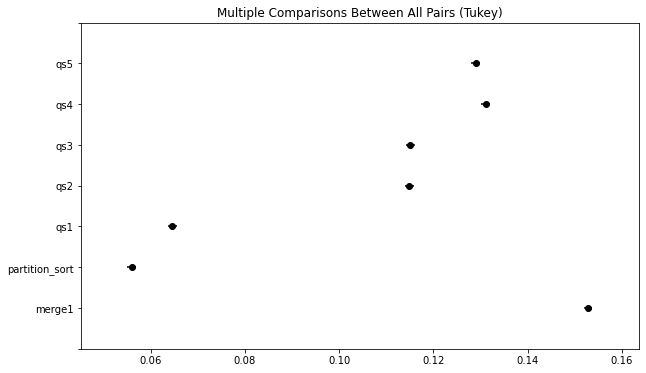

In [134]:
fig = post_hoc.plot_simultaneous()